In [ ]:
import pandas as pd
import os
from functools import reduce
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


In [5]:
# --- Load Individual DataFrames ---
data_path = '..\\data'
input_hdf_path = os.path.join(data_path, 'cleaned_data.h5')

df_keys = [
    'jpmx', 'resource_energy', 'resource_metals', 'resource_agrar',
    'country_risk', 'bbg_zinsen', 'bbg_spreads', 'bbg_inflation',
    'bbg_btc', 'bbg_pmi', 'bbg_eps', 'bbg_dollar_index', 'bbg_value_growth'
]

all_dfs_dict = {key: pd.read_hdf(input_hdf_path, key=key) for key in df_keys}

print("Following DataFrames were successfully loaded:")
for name, df in all_dfs_dict.items():
    print(f"- {name}: {df.shape}")

# (Optional) Unpack the DataFrames back into individual variables
# globals().update(all_dfs_dict) # This command would recreate the variable df_jpmx, for example. Might need it later

all_dfs = list(all_dfs_dict.values())

Following DataFrames were successfully loaded:
- jpmx: (5139, 9)
- resource_energy: (5316, 7)
- resource_metals: (6221, 14)
- resource_agrar: (5190, 8)
- country_risk: (66, 329)
- bbg_zinsen: (5369, 6)
- bbg_spreads: (5341, 3)
- bbg_inflation: (5364, 3)
- bbg_btc: (5369, 3)
- bbg_pmi: (5389, 4)
- bbg_eps: (5242, 2)
- bbg_dollar_index: (5365, 2)
- bbg_value_growth: (5369, 3)


In [48]:
# Merge all dataframes in the list based on the 'Date' column
main_df = reduce(lambda left, right: pd.merge(left, right, on='Date', how='outer'), all_dfs)

# --- Post-Merge Cleaning and Filtering ---
main_df.sort_values(by='Date', inplace=True)
main_df.drop_duplicates(subset=['Date'], keep='first', inplace=True)

start_date = '2005-01-03'
end_date = '2025-07-31'
main_df = main_df[(main_df['Date'] >= start_date) & (main_df['Date'] <= end_date)]

main_df.reset_index(drop=True, inplace=True)

# Set Date as Index
main_df.set_index('Date', inplace=True)

all_days = pd.date_range(start=main_df.index.min(), end=main_df.index.max(), freq='D')
main_df_resampled = main_df.reindex(all_days)
main_df_filled = main_df_resampled.ffill()
main_df_filled = main_df_filled.infer_objects(copy=False)

# Reset Index to 'Date' is a normal column again
#main_df_resampled.reset_index(inplace=True)
#main_df_resampled.rename(columns={'index': 'Date'}, inplace=True)
#main_df_filled.reset_index(inplace=True)
#main_df_filled.rename(columns={'index': 'Date'}, inplace=True)

print("Merged dataframe with missing days:", main_df.shape)
print("Merged dataframe after filling missing days:", main_df_filled.shape)

display(main_df_filled['2025-01-03': '2025-01-06'])
display(main_df_filled.loc[main_df_filled.index == '2009-06-30', 'Argentina_Country_Risk_RSSCAROR_Index'])
main_df_filled.info()

Merged dataframe with missing days: (6255, 380)
Merged dataframe after filling missing days: (7515, 380)


C:\Users\msark\AppData\Local\Temp\ipykernel_18652\1362767663.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_df_filled = main_df_resampled.ffill()


,EMBIG_Div_JPGCSOSD_Index.1,High_Grade_JPGCIGSS_Index.1,High_Yield_JPGCHYSS_Index.1,Africa_JPSSGDAF_Index.1,Asia_JPSSGDAS_Index.1,Europe_JPSSGDER_Index.1,Latin_America_JPSSGDLA_Index.1,Middle_East_JPSSGDME_Index.1,NYM_WTI_Rohöl_CL1_COMB_Comdty.1,ICE_Brent_Rohöl_CO1_Comdty.1,...,DE_5Y5Y_Inflation,VIX_VIX_Index,Bitcoin_XBTUSD_Curncy,US_PMI_Manufacturing_NAPMPMI_Index_Actual_Economic_Release_Values_ACTUAL_RELEASE,US_PMI_Services_NAPMNMI_Index_Actual_Economic_Release_Values_ACTUAL_RELEASE,Ifo_Index_GRIFPBUS_Index_Actual_Economic_Release_Values_ACTUAL_RELEASE,Earnings_per_Share_Forward_12M_MSCI_ACWI_BEst_EPS,DXY_Curncy,MSCI_ACWI_Value_MXWD000V_Index,MSCI_ACWI_Growth_MXWD000G_Index
2025-01-03,320.279,121.690,545.885,447.0,125.0,248.0,419.0,265.0,73.96,76.51,...,2.0487,16.13,98243.40,49.3,54.1,84.7,46.5512,108.952,275.12,591.39
2025-01-04,320.279,121.690,545.885,447.0,125.0,248.0,419.0,265.0,73.96,76.51,...,2.0487,16.13,98243.40,49.3,54.1,84.7,46.5512,108.952,275.12,591.39
2025-01-05,320.279,121.690,545.885,447.0,125.0,248.0,419.0,265.0,73.96,76.51,...,2.0487,16.13,98243.40,49.3,54.1,84.7,46.5512,108.952,275.12,591.39
2025-01-06,320.312,124.347,541.950,440.0,130.0,251.0,415.0,267.0,73.56,76.30,...,2.0775,16.04,101661.91,49.3,54.1,84.7,46.6131,108.257,275.30,598.58


2009-06-30    38.97
Freq: D, Name: Argentina_Country_Risk_RSSCAROR_Index, dtype: float64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7515 entries, 2005-01-03 to 2025-07-31
Freq: D
Columns: 380 entries, EMBIG_Div_JPGCSOSD_Index.1 to MSCI_ACWI_Growth_MXWD000G_Index
dtypes: float64(380)
memory usage: 22.1 MB


In [51]:
main_df_filled.columns.values

array(['EMBIG_Div_JPGCSOSD_Index.1', 'High_Grade_JPGCIGSS_Index.1',
       'High_Yield_JPGCHYSS_Index.1', 'Africa_JPSSGDAF_Index.1',
       'Asia_JPSSGDAS_Index.1', 'Europe_JPSSGDER_Index.1',
       'Latin_America_JPSSGDLA_Index.1', 'Middle_East_JPSSGDME_Index.1',
       'NYM_WTI_Rohöl_CL1_COMB_Comdty.1', 'ICE_Brent_Rohöl_CO1_Comdty.1',
       'NYM_Heizöl_HO1_COMB_Comdty.1', 'ICE_Gasöl_QS1_Comdty.1',
       'NYM_Erdgas_NG1_COMB_Comdty.1', 'Gas_Europa_TZT1_Comdty.1',
       'Gold_GC1_COMB_Comdty.1', 'Silver_SI1_COMB_Comdty.1',
       'Platinum_PL1_COMB_Comdty.1', 'Aluminum_LA1_Comdty.1',
       'Kupfer_HG1_COMB_Comdty.1', 'Blei_LL1_Comdty.1',
       'Nickel_LN1_Comdty.1', 'Zink_LX1_Comdty.1',
       'Cobalt_LMCODY_LME_Comdty.1', 'Eisenerz_IOE1_COMB_Comdty.1',
       'Uran_UXA1_Comdty.1', 'Bitcoin_XBTUSD_BGN_Curncy.1',
       'Zinn_LT1_Comdty.1', 'Mais_C_1_COMB_Comdty.1',
       'Sojabohnen_S_1_COMB_Comdty.1', 'Weizen_W_1_Comdty.1',
       'Zucker_SB1_Comdty.1', 'Kakao_CC1_Comdty.1',
   

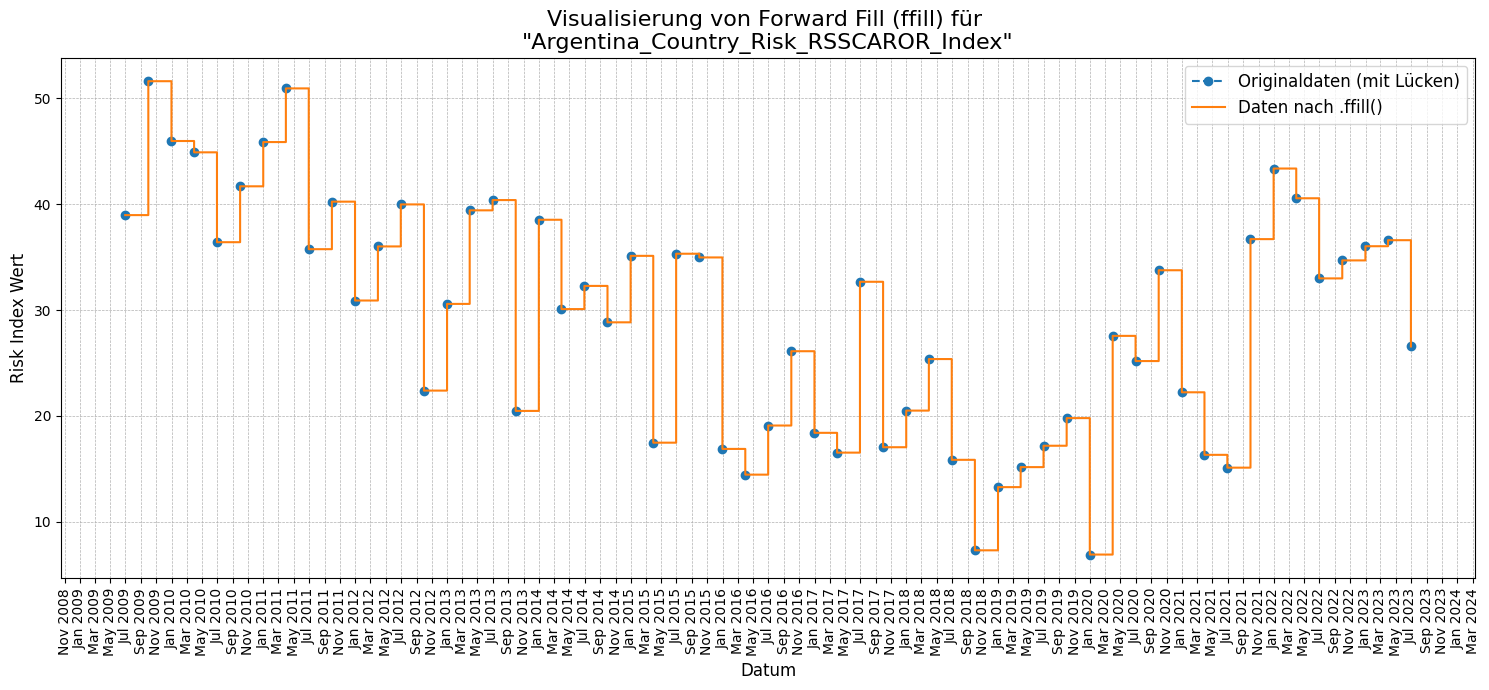

In [49]:
column_to_visualize = 'Argentina_Country_Risk_RSSCAROR_Index'

# Select DF before we used ffill
sample_df = main_df_resampled.loc['2009-03-31':'2023-06-30', [column_to_visualize]].copy()
# Use ffill
sample_df['ffilled'] = sample_df[column_to_visualize].ffill()

# Plot
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(
    sample_df.index,
    sample_df[column_to_visualize],
    marker='o',
    linestyle='--',
    label='Originaldaten (mit Lücken)'
)

ax.plot(
    sample_df.index,
    sample_df['ffilled'],
    linestyle='-',
    label='Daten nach .ffill()',
    drawstyle='steps-post'
)

ax.set_title(f'Visualisierung von Forward Fill (ffill) für \n"{column_to_visualize}"', fontsize=16)
ax.set_xlabel('Datum', fontsize=12)
ax.set_ylabel('Risk Index Wert', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()